## Seaborn

![seaborn](https://drive.google.com/uc?id=1j1ZM-tMaWYNCa_YkMGFIfymcrLS0MWG3)


- 엄청나게 화려한 시각화 기법들을 제공하며, 기본적으로 이쁩니다.
>  histplot, barplot, jointplot, lineplot, ...


- pandas DataFrame과 매우 호환이 잘 됩니다.

  >  e.g. sns.xxxplot(data=df)    **<--- 기본세팅!**

In [ ]:
!pip install seaborn==0.13.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [ ]:
sns.__version__

'0.13.1'

In [ ]:
# 라이브러리와 데이터를 불러오고, 시각화를 위한 세팅을 합니다.
import seaborn as sns
from seaborn import load_dataset
# from seaborn import set_palette, color_palette

# cp = color_palette()
# set_palette(cp)
data = load_dataset('penguins').dropna()  # NaN가 하나라도 포함된 row가 있다면 제외.
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Histplot

- 가장 기본적으로 사용되는 히스토그램을 출력하는 plot.

- 전체 데이터를 특정 구간별 정보를 확인할 때 사용합니다.

- 수치형 데이터(연속형)의 대략적인 분포를 확인할 때 사용

-

<Axes: xlabel='bill_length_mm', ylabel='Count'>

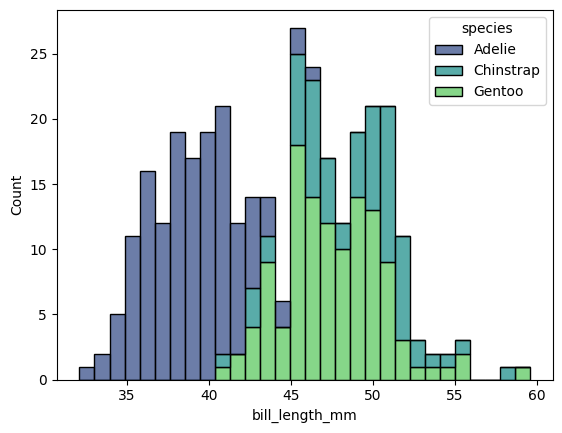

In [ ]:
# penguin 데이터에 histplot을 출력합니다.
## color pallette name : Blues(단일색상), Set2(discrete - 서로 색상이 비교적 다른 편),viridis, Spectral(continuous - 연속적으로 색상 표현)

sns.histplot(data=data, x='bill_length_mm', bins=30, hue='species', multiple='stack', palette='viridis')

(30.0, 60.0)

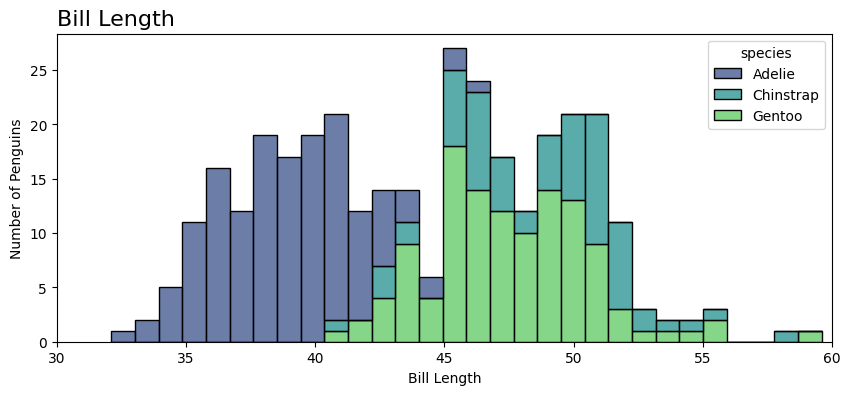

In [ ]:
import matplotlib.pyplot as plt

# plt 를 plot 전에 쓰는 것과 plot 이후에 쓰는 것이 다름. plot 이전/이후 세팅됨.

plt.figure(figsize=(10,4)) #도화지 세팅(가로,세로)
plt.title("Bill Length", fontsize=16, loc='left')
sns.histplot(data=data, x='bill_length_mm', bins=30, hue='species', multiple='stack', palette='viridis')
plt.xlabel("Bill Length")
plt.ylabel("Number of Penguins")
#plt.xticks(0,10,20,30,40,50,60)
#plt.xticks([n*10 for in range(7)])
plt.xlim(30, 60)


### Displot

- distribution들을 여러 subplot들로 나눠서 출력해주는 plot.


- displot에 kind를 변경하는 것으로, histplot, kdeplot, ecdfplot 모두 출력이 가능합니다.

e.g. displot(kind="hist")

- 동시에 여러개 표현하는 것 지원

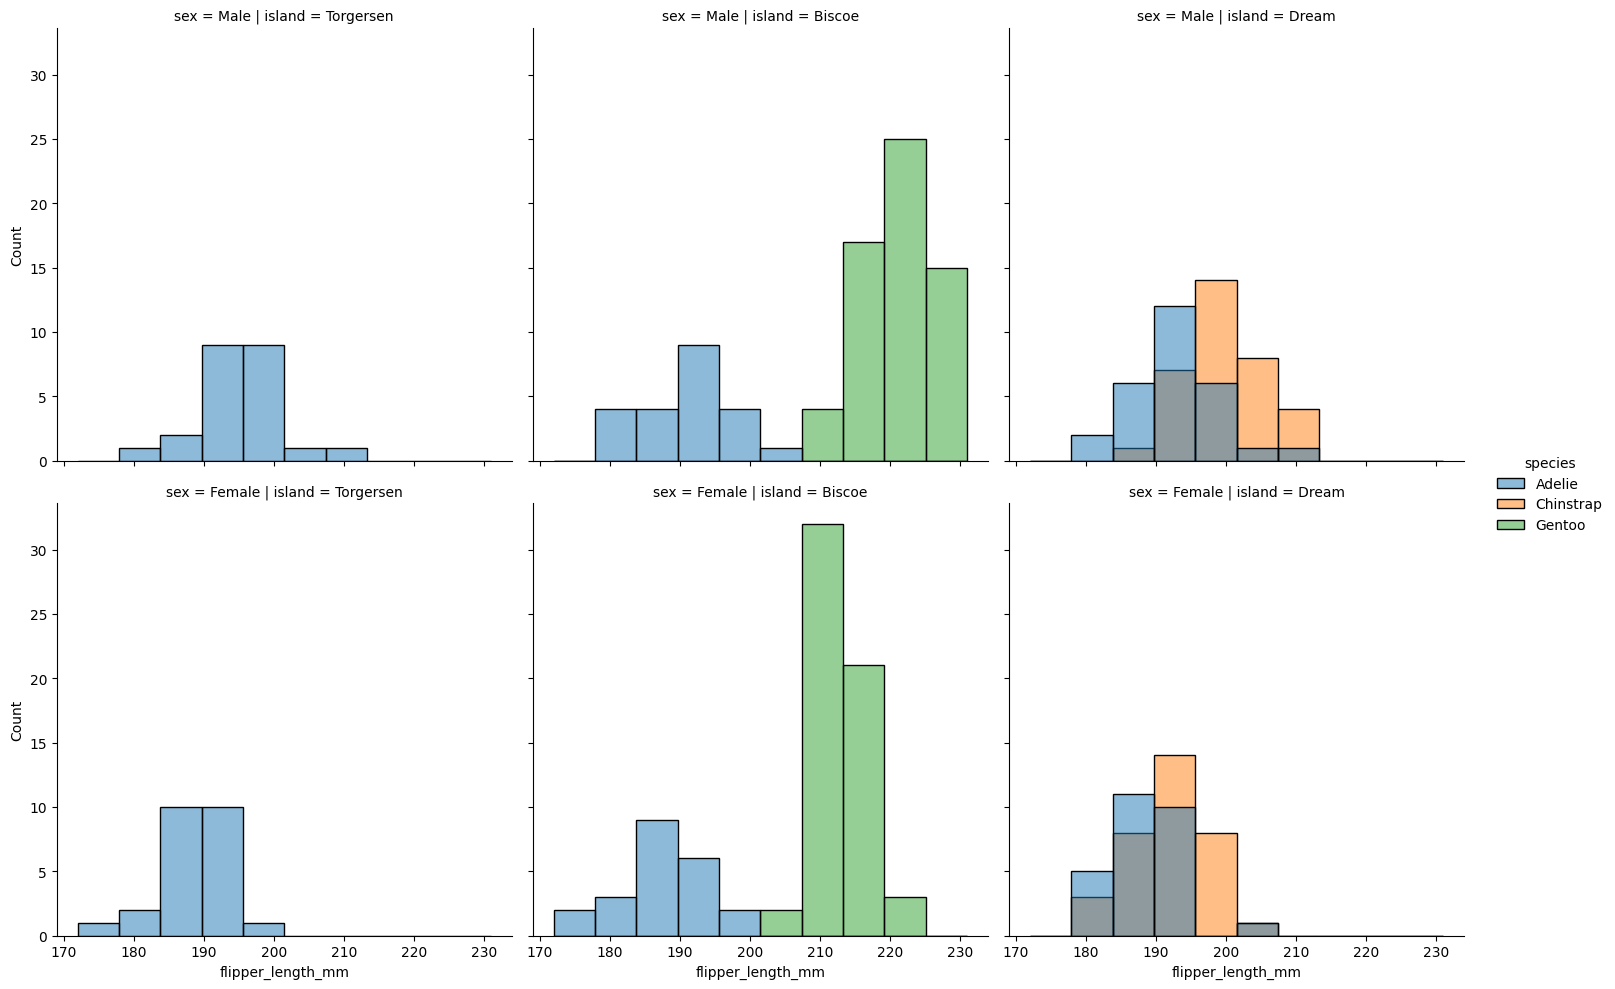

In [ ]:
# penguin 데이터에 displot을 출력합니다.
sns.displot(data=data, x="flipper_length_mm", kind="hist", col='island', row='sex', hue='species') #d #kdc(밀도) #ecdf(누적확률분포) #hist #col=column

### Barplot

- 어떤 데이터에 대한 값의 크기를 막대로 보여주는 plot. (a.k.a. 막대그래프)


- 가로 / 세로 두 가지로 모두 출력 가능합니다.


- 히스토그램과는 다릅니다!

<Axes: xlabel='body_mass_g', ylabel='species'>

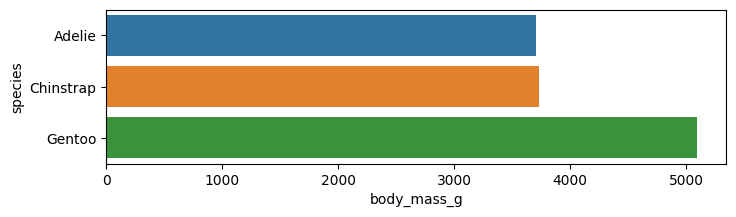

In [ ]:
# penguin 데이터에 barplot을 출력합니다.
plt.figure(figsize=(8,2))
sns.barplot(data=data, y='species', x='body_mass_g',errorbar=None, hue='species' )

### Countplot

- 범주형 속성을 가지는 데이터들의 histogram을 보여주는 plot.



- 종류별 count를 보여주는 방법입니다.

<Axes: xlabel='sex', ylabel='count'>

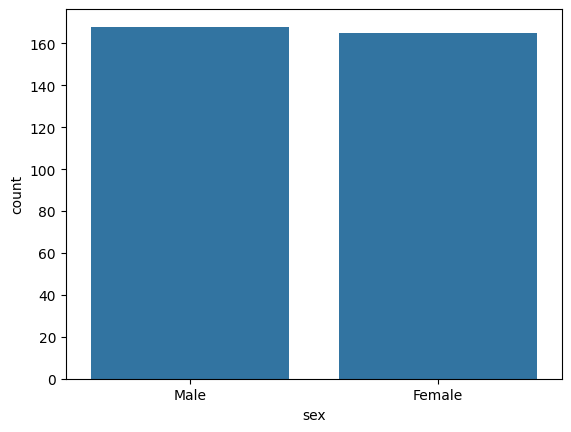

In [ ]:
# penguin 데이터에 countplot을 출력합니다.
sns.countplot(data=data, x='sex')

### Boxplot


- 데이터의 각 종류별로 사분위 수(quantile)를 표시하는 plot.


- 특정 데이터의 전체적인 분포를 확인하기 좋은 시각화 기법입니다.


- box와 전체 range의 그림을 통해 outlier를 찾기 쉽습니다. (IQR : Inter-Quantile Range)

<Axes: xlabel='species', ylabel='body_mass_g'>

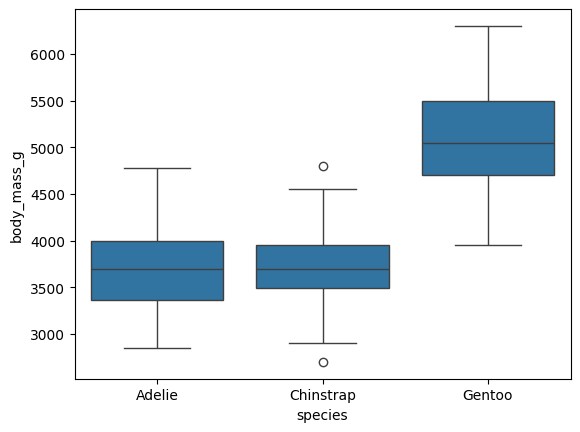

In [ ]:
# penguin 데이터에 boxplot을 출력합니다.
sns.boxplot(data=data, x='species', y='body_mass_g')
# What is boxplot?
## IQR(가운데 박스 부분): Inter-Quartile-Range (사분위수 사이의 범위: q75 - q25 (75% - 25%))
## IQR 기반으로 계산한 아웃라이어(통계적으로 정의하는 아웃라이어): Chinstrap species 박스 플롯에서 위아래 동그라미 부분
### lower_bound = q25 - IQR * 1.5
### upper_bound = q75 + IQR * 1.5
### Adelie, Gentoo 위아래 가로선은 최대/최소

### Violinplot

- 데이터에 대한 분포 자체를 보여주는 plot.


- boxplot과 비슷하지만, 전체 분포에 대한 그림을 보여준다는 점에서 boxplot과 다릅니다.


- 보통 boxplot과 함께 표시하면, 평균 근처에 데이터가 얼마나 있는지(boxplot) 전체적으로 어떻게 퍼져있는지(violinplot) 모두 확인이 가능합니다.

In [ ]:
# penguin 데이터에 violinplot을 출력합니다.


### Lineplot

- 특정 데이터를 x, y로 표시하여 관계를 확인할 수 있는 plot. (선 그래프)


- 수치형 지표들 간의 경향을 파악할 때 많이 사용합니다.

In [ ]:
# penguin 데이터에 lineplot을 출력합니다.
data.sort_values(by='body_mass_g')
# index를 추가하는 방식이 있고, X,Y만 사용하는 방식이 있음.
# 아래에서 index 추가하는 방식으로...

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
190,Chinstrap,Dream,46.9,16.6,192.0,2700.0,Female
64,Adelie,Biscoe,36.4,17.1,184.0,2850.0,Female
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,Female
116,Adelie,Torgersen,38.6,17.0,188.0,2900.0,Female
98,Adelie,Dream,33.1,16.1,178.0,2900.0,Female
...,...,...,...,...,...,...,...
299,Gentoo,Biscoe,45.2,16.4,223.0,5950.0,Male
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,Male
297,Gentoo,Biscoe,51.1,16.3,220.0,6000.0,Male
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male


<Axes: xlabel='None', ylabel='body_mass_g'>

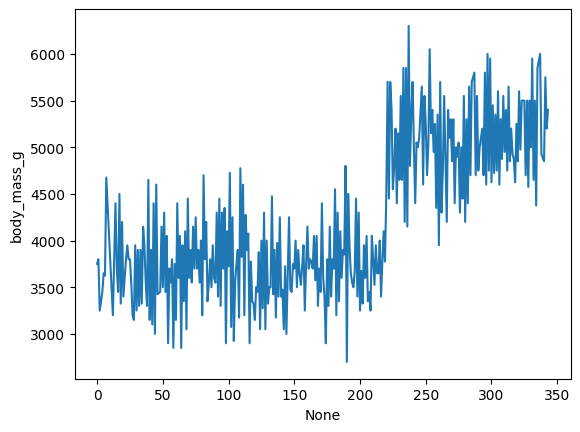

In [ ]:
# penguin 데이터에 lineplot을 출력합니다.
import numpy as np

temp = data.sort_values(by='body_mass_g')
temp['id'] = np.arange(len(temp))
#sns.lineplot(data=temp, x='id', y='body_mass_g')

sns.lineplot(x=data.index, y=data.body_mass_g)

### Pointplot

- 특정 수치 데이터를 error bar와 함께 출력해주는 plot.



- 수치 데이터를 다양한 각도에서 한 번에 바라보고 싶을 때 사용합니다.


- 데이터와 error bar를 한 번에 찍어주기 때문에, 살펴보고 싶은 특정 지표들만 사용하는 것이 좋습니다.

In [ ]:
# penguin 데이터에 pointplot을 출력합니다.


### Scatterplot

- lineplot과 비슷하게 x, y에 대한 전체적인 분포를 확인하는 plot.


- lineplot은 경향성에 초점을 둔다면, scatterplot은 데이터 그 자체가 퍼져있는 모양에 중점을 둡니다.

<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

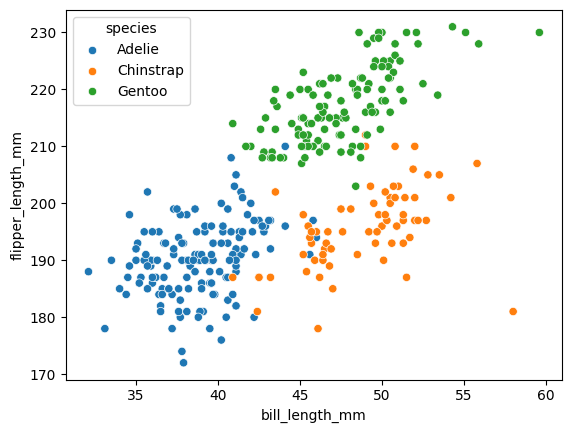

In [ ]:

# penguin 데이터에 scatterplot을 출력합니다.
sns.scatterplot(data=data, x='bill_length_mm', y='flipper_length_mm', hue='species')

### Pairplot


- 주어진 데이터의 각 feature들 사이의 관계를 표시하는 Plot.


- scatterplot, FacetGrid, kdeplot을 이용하여 feature간의 관계를 잘 보여줍니다.


- 각 feature에 대해 계산된 모든 결과를 보여주기 때문에, feature가 많은 경우 사용하기 적합하지 않습니다.

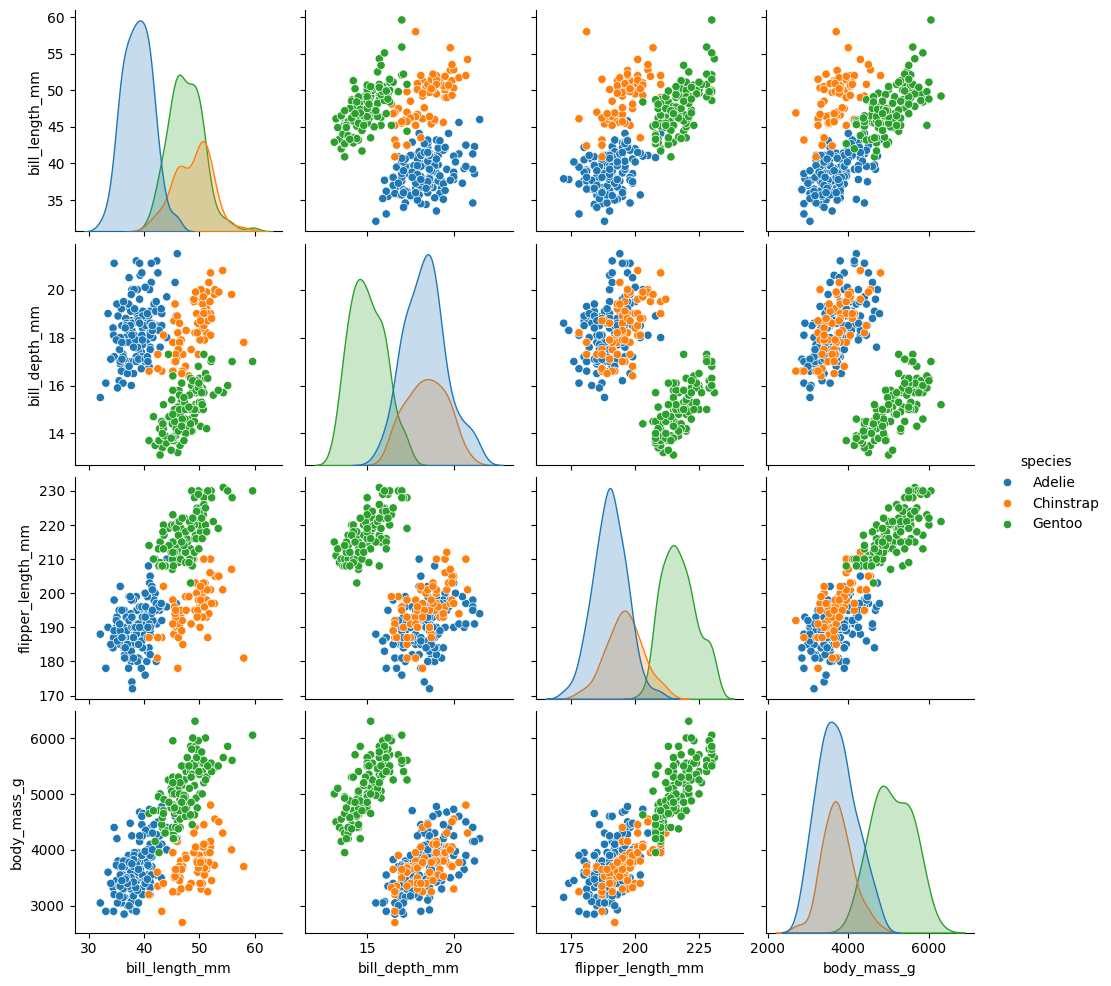

In [ ]:
# penguin 데이터에 pairplot을 출력합니다.
sns.pairplot(data=data, hue='species')

### Heatmap

- 정사각형 그림에 데이터에 대한 정도 차이를 색 차이로 보여주는 plot.


- 말 그대로 heatmap이기 때문에, 열화상카메라로 사물을 찍은 것처럼 정보의 차이를 보여줍니다.


- pairplot과 비슷하게 feature간 관계를 시각화할 때 많이 사용합니다.

**상관관계란?**
- 어떤 X값의 변화에 따라 Y값의 선형적으로 변화하는지를 측정한 지표.

- [-1, 1]


e.g. 아이스크림 판매량 증가 <----> 상어에 물린 사람 수

In [ ]:
data.corr(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


In [ ]:
# 각 feature간 상관관계를 파악하기 위해 Correlation matrix를 만듭니다.
corr = data.corr(numeric_only=True)
corr

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

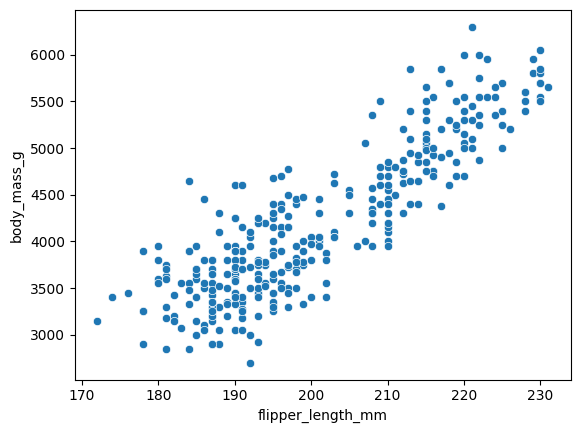

In [ ]:
sns.scatterplot(data=data, x='flipper_length_mm', y='body_mass_g')
# 양의 상관관계 확인 가능

<Axes: >

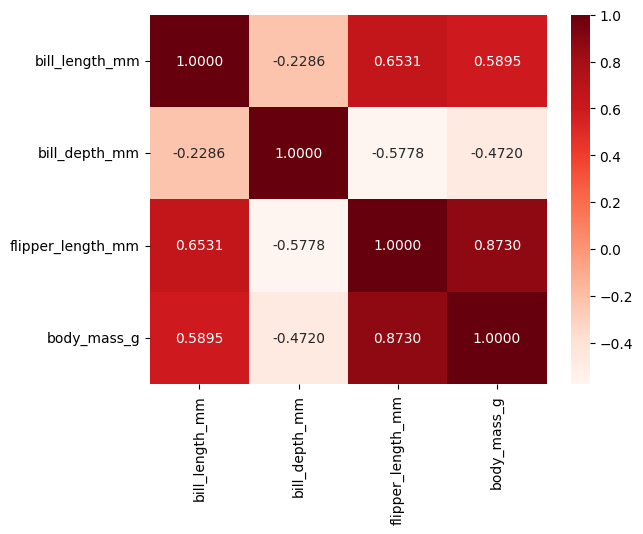

In [ ]:
# penguin 데이터에 heatmap을 출력합니다.
# 1. sns.heatmap(data=corr)
## annot=True : 안에 글씨를 넣고 싶으면 <= 보통 데이터가 적을 때
## fmt : 포맷지정 (fmt='.4f') 소수점 4자리까지 <= 보통 데이터가 적을 때
## cmap : pallette 옵션은 없고, 컬러맵은 cmap
sns.heatmap(data=corr, annot=True, fmt='.4f', cmap='Reds')